In [12]:
import requests
import pandas as pd 
import numpy as np
import re
import sys, getopt
import csv
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
plot_Data_competitions = pd.read_csv('split_competitions_win_pct_mkt_value_diff_ABOVE_INTERVALS.csv')


In [3]:
competition_dfs = {comp: df for comp, df in plot_Data_competitions.groupby('Competition')}


In [115]:
# def plot_competition_data(subset, competition_name):
#     # Drop rows with NaN values in 'average_mv_prediction_correct'
#     subset = subset.dropna(subset=['average_mv_prediction_correct'])
    
#     plt.figure(figsize=(10, 6))
    
#     # Create the plot
#     plot = sns.lineplot(data=subset, x='interval', y='average_mv_prediction_correct', alpha=0.7)
    
#     # Highlight vertical bars where Y value is at or above 0.75
#     for _, row in subset.iterrows():
#         if row['average_mv_prediction_correct'] >= 0.75:
#             plt.axvspan(row['interval'] - 0.1, row['interval'] + 0.1, color='pink', alpha=0.3)
    
#     # Add scatter plot with conditional coloring
#     scatter = sns.scatterplot(
#         data=subset, 
#         x='interval', 
#         y='average_mv_prediction_correct', 
#         size='sample_size', 
#         legend=False, 
#         sizes=(20, 200),
#         hue=subset['average_mv_prediction_correct'] >= 0.75,  # Conditional coloring
#         palette={True: 'red', False: 'blue'}  # Colors for the condition
#     )
    
#     # Calculate the maximum sample size
#     max_sample_size = subset['sample_size'].max()
    
#     # Add text annotations for sample size with more aggressive logarithmically decreasing intervals
#     last_annotation_index = -np.inf
#     smallest_sample_sizes = subset.nsmallest(5, 'sample_size')
#     for i, row in subset.iterrows():
#         # Calculate the interval based on a more aggressive logarithm of the average_mv_prediction_correct
#         interval = int(1000 / (1 + 2 * np.log1p(row['average_mv_prediction_correct'])))
        
#         # Adjust interval based on sample size with multiple thresholds
#         if row['sample_size'] < 0.5 * max_sample_size:
#             interval *= 2  # Increase the interval when sample size is less than 50% of the max sample size
#         if row['sample_size'] < 0.2 * max_sample_size:
#             interval *= 2  # Further increase the interval when sample size is less than 20% of the max sample size
#         if row['sample_size'] < 0.1 * max_sample_size:
#             interval *= 2  # Further increase the interval when sample size is less than 10% of the max sample size
        
#         if i - last_annotation_index >= interval or row['sample_size'] in smallest_sample_sizes['sample_size'].values:
#             plt.text(row['interval'], row['average_mv_prediction_correct'] + 0.1, f'{int(row["sample_size"])}',
#                      horizontalalignment='center', size='small', color='black', weight='semibold', rotation=90)
#             last_annotation_index = i
    
#     # Add a legend for the sample size text
#     plt.text(0.05, 0.95, 'Sample Size', horizontalalignment='left', verticalalignment='top', 
#              transform=plt.gca().transAxes, size='medium', color='black', weight='semibold', rotation=0)
    
#     # Find the highest X value
#     max_x_value = subset['interval'].max()
#     max_x_row = subset[subset['interval'] == max_x_value].iloc[0]
#     max_x_y_value = max_x_row['average_mv_prediction_correct']
    
#     # Add text annotation for the highest X value
#     plt.text(max_x_value, max_x_y_value, f'Highest X: {max_x_value}', 
#              horizontalalignment='right', size='medium', color='red', weight='semibold')
    
#     # Set X axis to a logarithmic scale
#     plt.xscale('log')
    
#     # Set Y axis limits
#     plt.ylim(0, 1)
    
#     # Add more Y axis ticks
#     plt.yticks(np.arange(0, 1.1, 0.1))
    
#     # Add labels and title
#     plt.title(f"% of correctly predicted matches by difference in market value, {competition_name}")
#     plt.xlabel("Interval (log scale)")
#     plt.ylabel("Average MV Prediction Correct")
    
#     # Use a minimal theme
#     sns.despine()
    
#     # Display the plot
#     plt.show()
    
#     # Clear the current plot to free memory
#     plt.clf()

In [120]:
def plot_competition_data(subset, competition_name):
    # Drop rows with NaN values in 'average_mv_prediction_correct'
    subset = subset.dropna(subset=['average_mv_prediction_correct'])
    
    plt.figure(figsize=(10, 6))
    
    # Create the plot
    plot = sns.lineplot(data=subset, x='interval', y='average_mv_prediction_correct', alpha=0.7)
    
    # Highlight vertical bars where Y value is at or above 0.75
    for _, row in subset.iterrows():
        if row['average_mv_prediction_correct'] >= 0.75:
            plt.axvspan(row['interval'] - 0.1, row['interval'] + 0.1, color='pink', alpha=0.3)
    
    # Add scatter plot with conditional coloring
    scatter = sns.scatterplot(
        data=subset, 
        x='interval', 
        y='average_mv_prediction_correct', 
        size='sample_size', 
        legend=False, 
        sizes=(20, 200),
        hue=subset['average_mv_prediction_correct'] >= 0.75,  # Conditional coloring
        palette={True: 'red', False: 'blue'}  # Colors for the condition
    )
    
    # Calculate the maximum sample size
    max_sample_size = subset['sample_size'].max()
    
    # Add text annotations for sample size with much larger intervals
    last_annotation_index = -np.inf
    smallest_sample_sizes = subset.nsmallest(5, 'sample_size')
    for i, row in subset.iterrows():
        # Calculate the interval based on a much larger base interval
        interval = int(3000 / (1 + 2 * np.log1p(row['average_mv_prediction_correct'])))
        
        # Adjust interval based on sample size with multiple thresholds
        if row['sample_size'] < 0.5 * max_sample_size:
            interval *= 2  # Increase the interval when sample size is less than 50% of the max sample size
        if row['sample_size'] < 0.2 * max_sample_size:
            interval *= 2  # Further increase the interval when sample size is less than 20% of the max sample size
        if row['sample_size'] < 0.1 * max_sample_size:
            interval *= 2  # Further increase the interval when sample size is less than 10% of the max sample size
        
        if i - last_annotation_index >= interval or row['sample_size'] in smallest_sample_sizes['sample_size'].values:
            plt.text(row['interval'], row['average_mv_prediction_correct'] + 0.1, f'{int(row["sample_size"])}',
                     horizontalalignment='center', size='small', color='black', weight='semibold', rotation=90)
            last_annotation_index = i
    
    # Add a legend for the sample size text
    plt.text(0.05, 0.95, 'Sample Size', horizontalalignment='left', verticalalignment='top', 
             transform=plt.gca().transAxes, size='medium', color='black', weight='semibold', rotation=0)
    
    # Find the highest X value
    max_x_value = subset['interval'].max()
    max_x_row = subset[subset['interval'] == max_x_value].iloc[0]
    max_x_y_value = max_x_row['average_mv_prediction_correct']
    
    # Add text annotation for the highest X value
    plt.text(max_x_value, max_x_y_value, f'Highest X: {max_x_value}', 
             horizontalalignment='right', size='medium', color='red', weight='semibold')
    
    # Set X axis to a logarithmic scale
    plt.xscale('log')
    
    # Set Y axis limits
    plt.ylim(0, 1)
    
    # Add more Y axis ticks
    plt.yticks(np.arange(0, 1.1, 0.1))
    
    # Add labels and title
    plt.title(f"% of correctly predicted matches by difference in market value, {competition_name}", pad=20, loc='left')
    plt.xlabel("Interval (log scale)")
    plt.ylabel("Average MV Prediction Correct")
    
    # Use a minimal theme
    sns.despine()
    
    # Display the plot
    plt.show()
    
    # Clear the current plot to free memory
    plt.clf()

In [126]:
list(competition_dfs.keys())[13]

'World Cup Qualifiers, CONMEBOL'

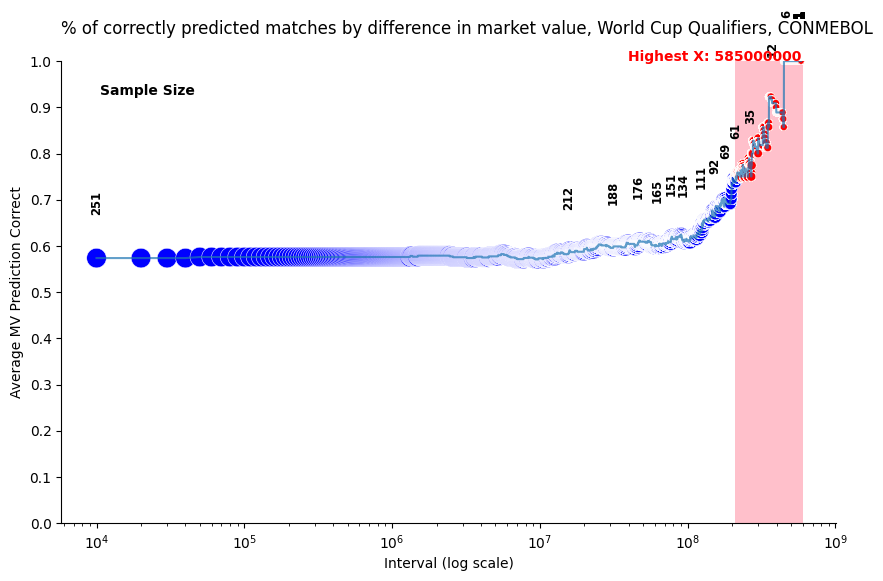

<Figure size 640x480 with 0 Axes>

In [127]:

number = 12
number = number + 1
keynum = list(competition_dfs.keys())[number]
plot_competition_data(competition_dfs[keynum], keynum)